##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [13]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [14]:
!pip install -q mediapipe

In [19]:
!pip uninstall -q mediapipe

Proceed (Y/n)? y


In [21]:
!pip install -q mediapipe

In [23]:
!pip install protobuf==5.29.1 numpy==2.0.0 --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 138.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.0.0 which is incompatible.
mediapipe 0.10.21 requires protobuf<5,>=4.25.3, but you have protobuf 5.29.1 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
!pip install mediapipe==0.10.9 --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.10.21
    Uninstalling mediapipe-0.10.21:
      Successfully uninstalled mediapipe-0.10.21


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [3]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [4]:

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

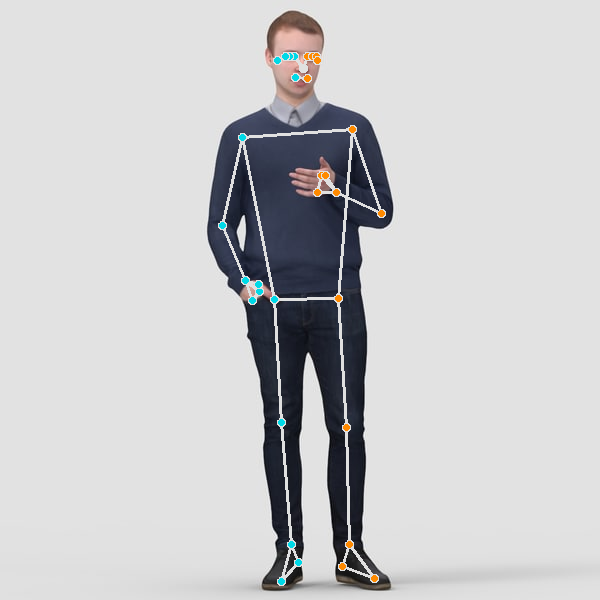

In [17]:
!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("pic.png")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [7]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


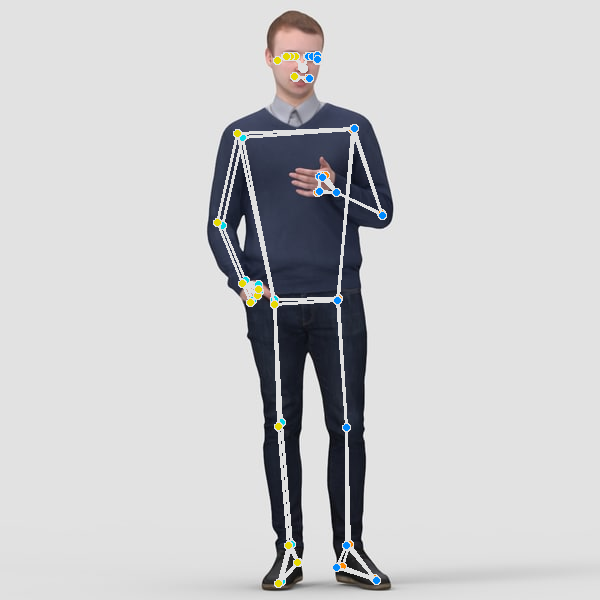

In [18]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("pic.png")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Visualize the pose segmentation mask.

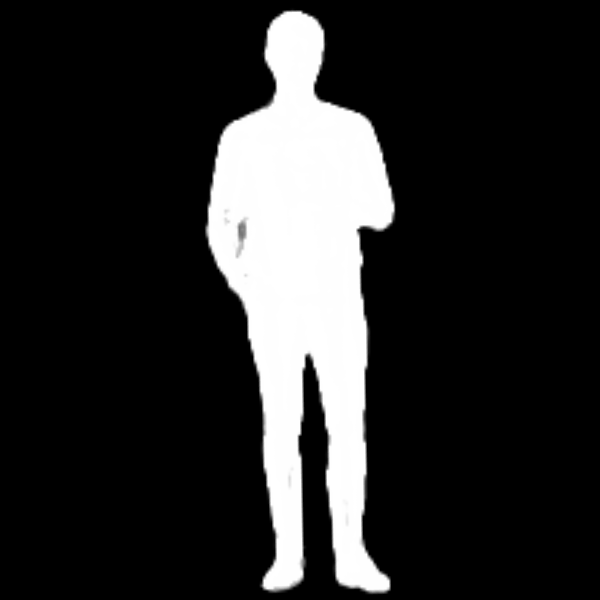

In [23]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

In [28]:

def get_body_measurements(pose_landmarks, user_height_cm):
    # Helper to compute pixel distance between two landmarks
    def pixel_distance(lm1, lm2):
        return np.sqrt((lm1.x - lm2.x)**2 + (lm1.y - lm2.y)**2)

    # Reference landmarks
    left_shoulder = pose_landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = pose_landmarks[mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER]
    left_hip = pose_landmarks[mp.solutions.pose.PoseLandmark.LEFT_HIP]
    right_hip = pose_landmarks[mp.solutions.pose.PoseLandmark.RIGHT_HIP]
    left_knee = pose_landmarks[mp.solutions.pose.PoseLandmark.LEFT_KNEE]
    left_ankle = pose_landmarks[mp.solutions.pose.PoseLandmark.LEFT_ANKLE]
    left_elbow = pose_landmarks[mp.solutions.pose.PoseLandmark.LEFT_ELBOW]
    right_elbow = pose_landmarks[mp.solutions.pose.PoseLandmark.RIGHT_ELBOW]
    left_wrist = pose_landmarks[mp.solutions.pose.PoseLandmark.LEFT_WRIST]
    right_wrist = pose_landmarks[mp.solutions.pose.PoseLandmark.RIGHT_WRIST]
    nose = pose_landmarks[mp.solutions.pose.PoseLandmark.NOSE]
    left_foot = pose_landmarks[mp.solutions.pose.PoseLandmark.LEFT_FOOT_INDEX]

    # Estimate full body height in pixels
    height_pixels = pixel_distance(nose, left_foot)
    scale = user_height_cm / height_pixels

    # Measurements in pixels
    shoulder_px = pixel_distance(left_shoulder, right_shoulder)
    chest_px = pixel_distance(left_elbow, right_elbow)
    waist_px = pixel_distance(left_hip, right_hip)
    hip_px = pixel_distance(left_hip, right_hip)  # Often same as waist in pose models
    inseam_px = pixel_distance(left_hip, left_ankle)

    # Convert to cm
    measurements = {
        "shoulder_width_cm": shoulder_px * scale,
        "chest_width_cm": chest_px * scale,
        "waist_width_cm": waist_px * scale,
        "hip_width_cm": hip_px * scale,
        "inseam_length_cm": inseam_px * scale
    }

    return measurements

user_height_cm = 152  # Example: user provides their height
pose_landmarks = detection_result.pose_landmarks[0]
mea = get_body_measurements(pose_landmarks, user_height_cm)

for key, value in mea.items():
    print(f"{key}: {value:.2f} cm")



def recommend_size(mea):
    shoulder = mea["shoulder_width_cm"]
    chest = mea["chest_width_cm"]
    waist = mea["waist_width_cm"]
    hip = mea["hip_width_cm"]

    # Simple logic based on shoulder and chest
    if shoulder < 35 or chest < 85:
        return "XS"
    elif shoulder < 40 or chest < 90:
        return "S"
    elif shoulder < 45 or chest < 100:
        return "M"
    elif shoulder < 50 or chest < 110:
        return "L"
    else:
        return "XL"
size = recommend_size(mea)
print(f"Recommended size: {size}")


shoulder_width_cm: 34.34 cm
chest_width_cm: 48.45 cm
waist_width_cm: 18.41 cm
hip_width_cm: 18.41 cm
inseam_length_cm: 72.15 cm
Recommended size: XS
